In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'Company_Data RandomForest.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='High'

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [10]:
df.drop(['Sales'],axis=1,inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [13]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_class']= label_encoder.fit_transform(df['Sales_class'])

In [14]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


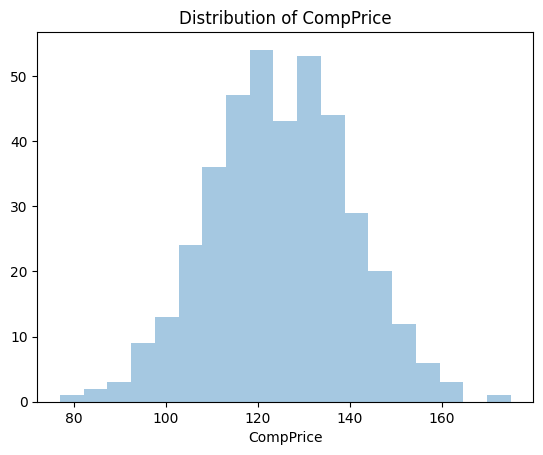

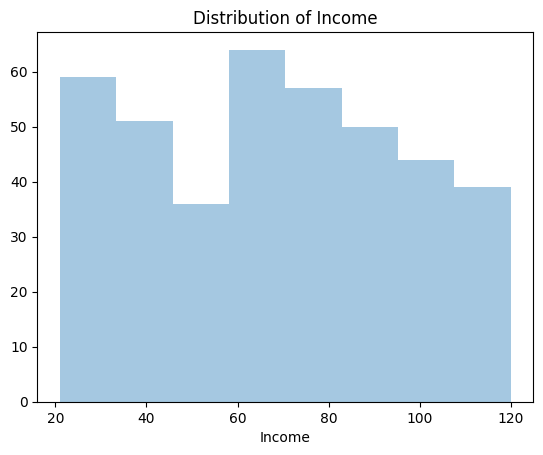

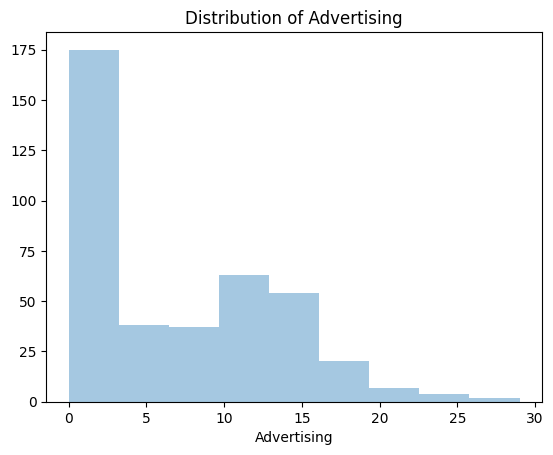

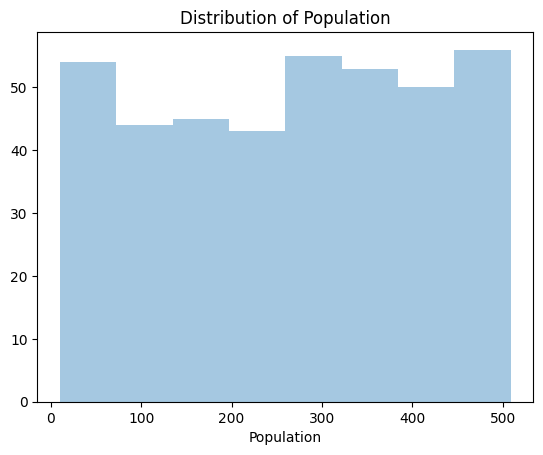

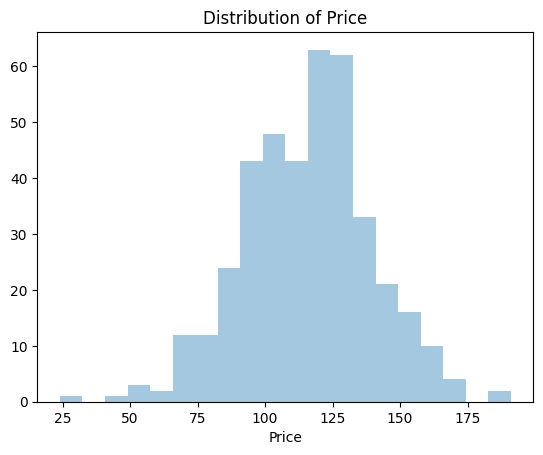

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['CompPrice'], kde=False)
plt.title("Distribution of CompPrice")
plt.show()

fig = sns.distplot(df['Income'], kde=False)
plt.title("Distribution of Income")
plt.show()

fig = sns.distplot(df['Advertising'], kde=False)
plt.title("Distribution of Advertising")
plt.show()

fig = sns.distplot(df['Population'], kde=False)
plt.title("Distribution of Population")
plt.show()

fig = sns.distplot(df['Price'], kde=False)
plt.title("Distribution of Price")
plt.show()

plt.show()

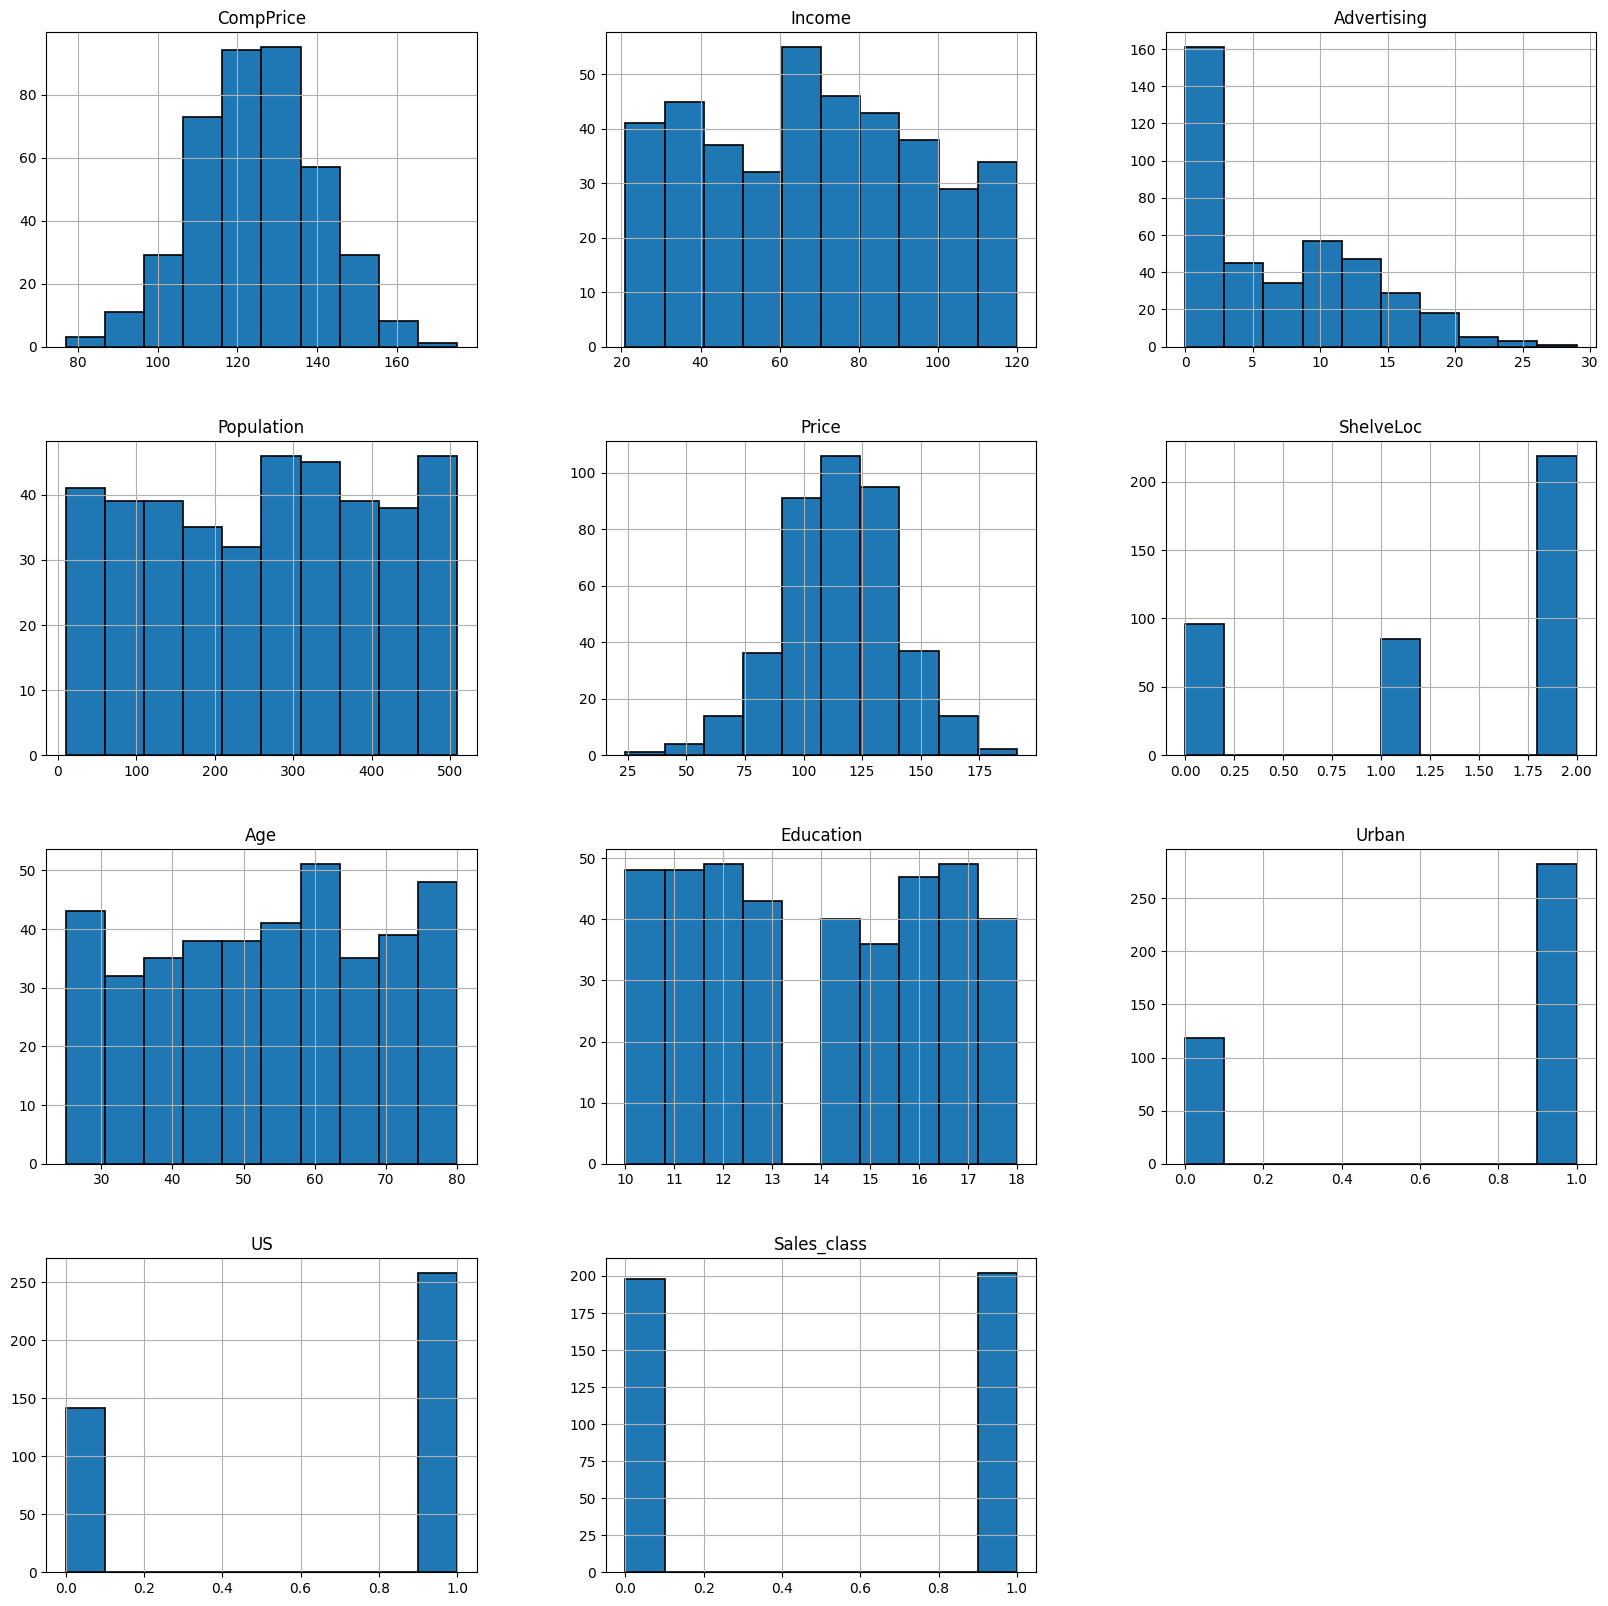

In [16]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Figure size 2000x2000 with 0 Axes>

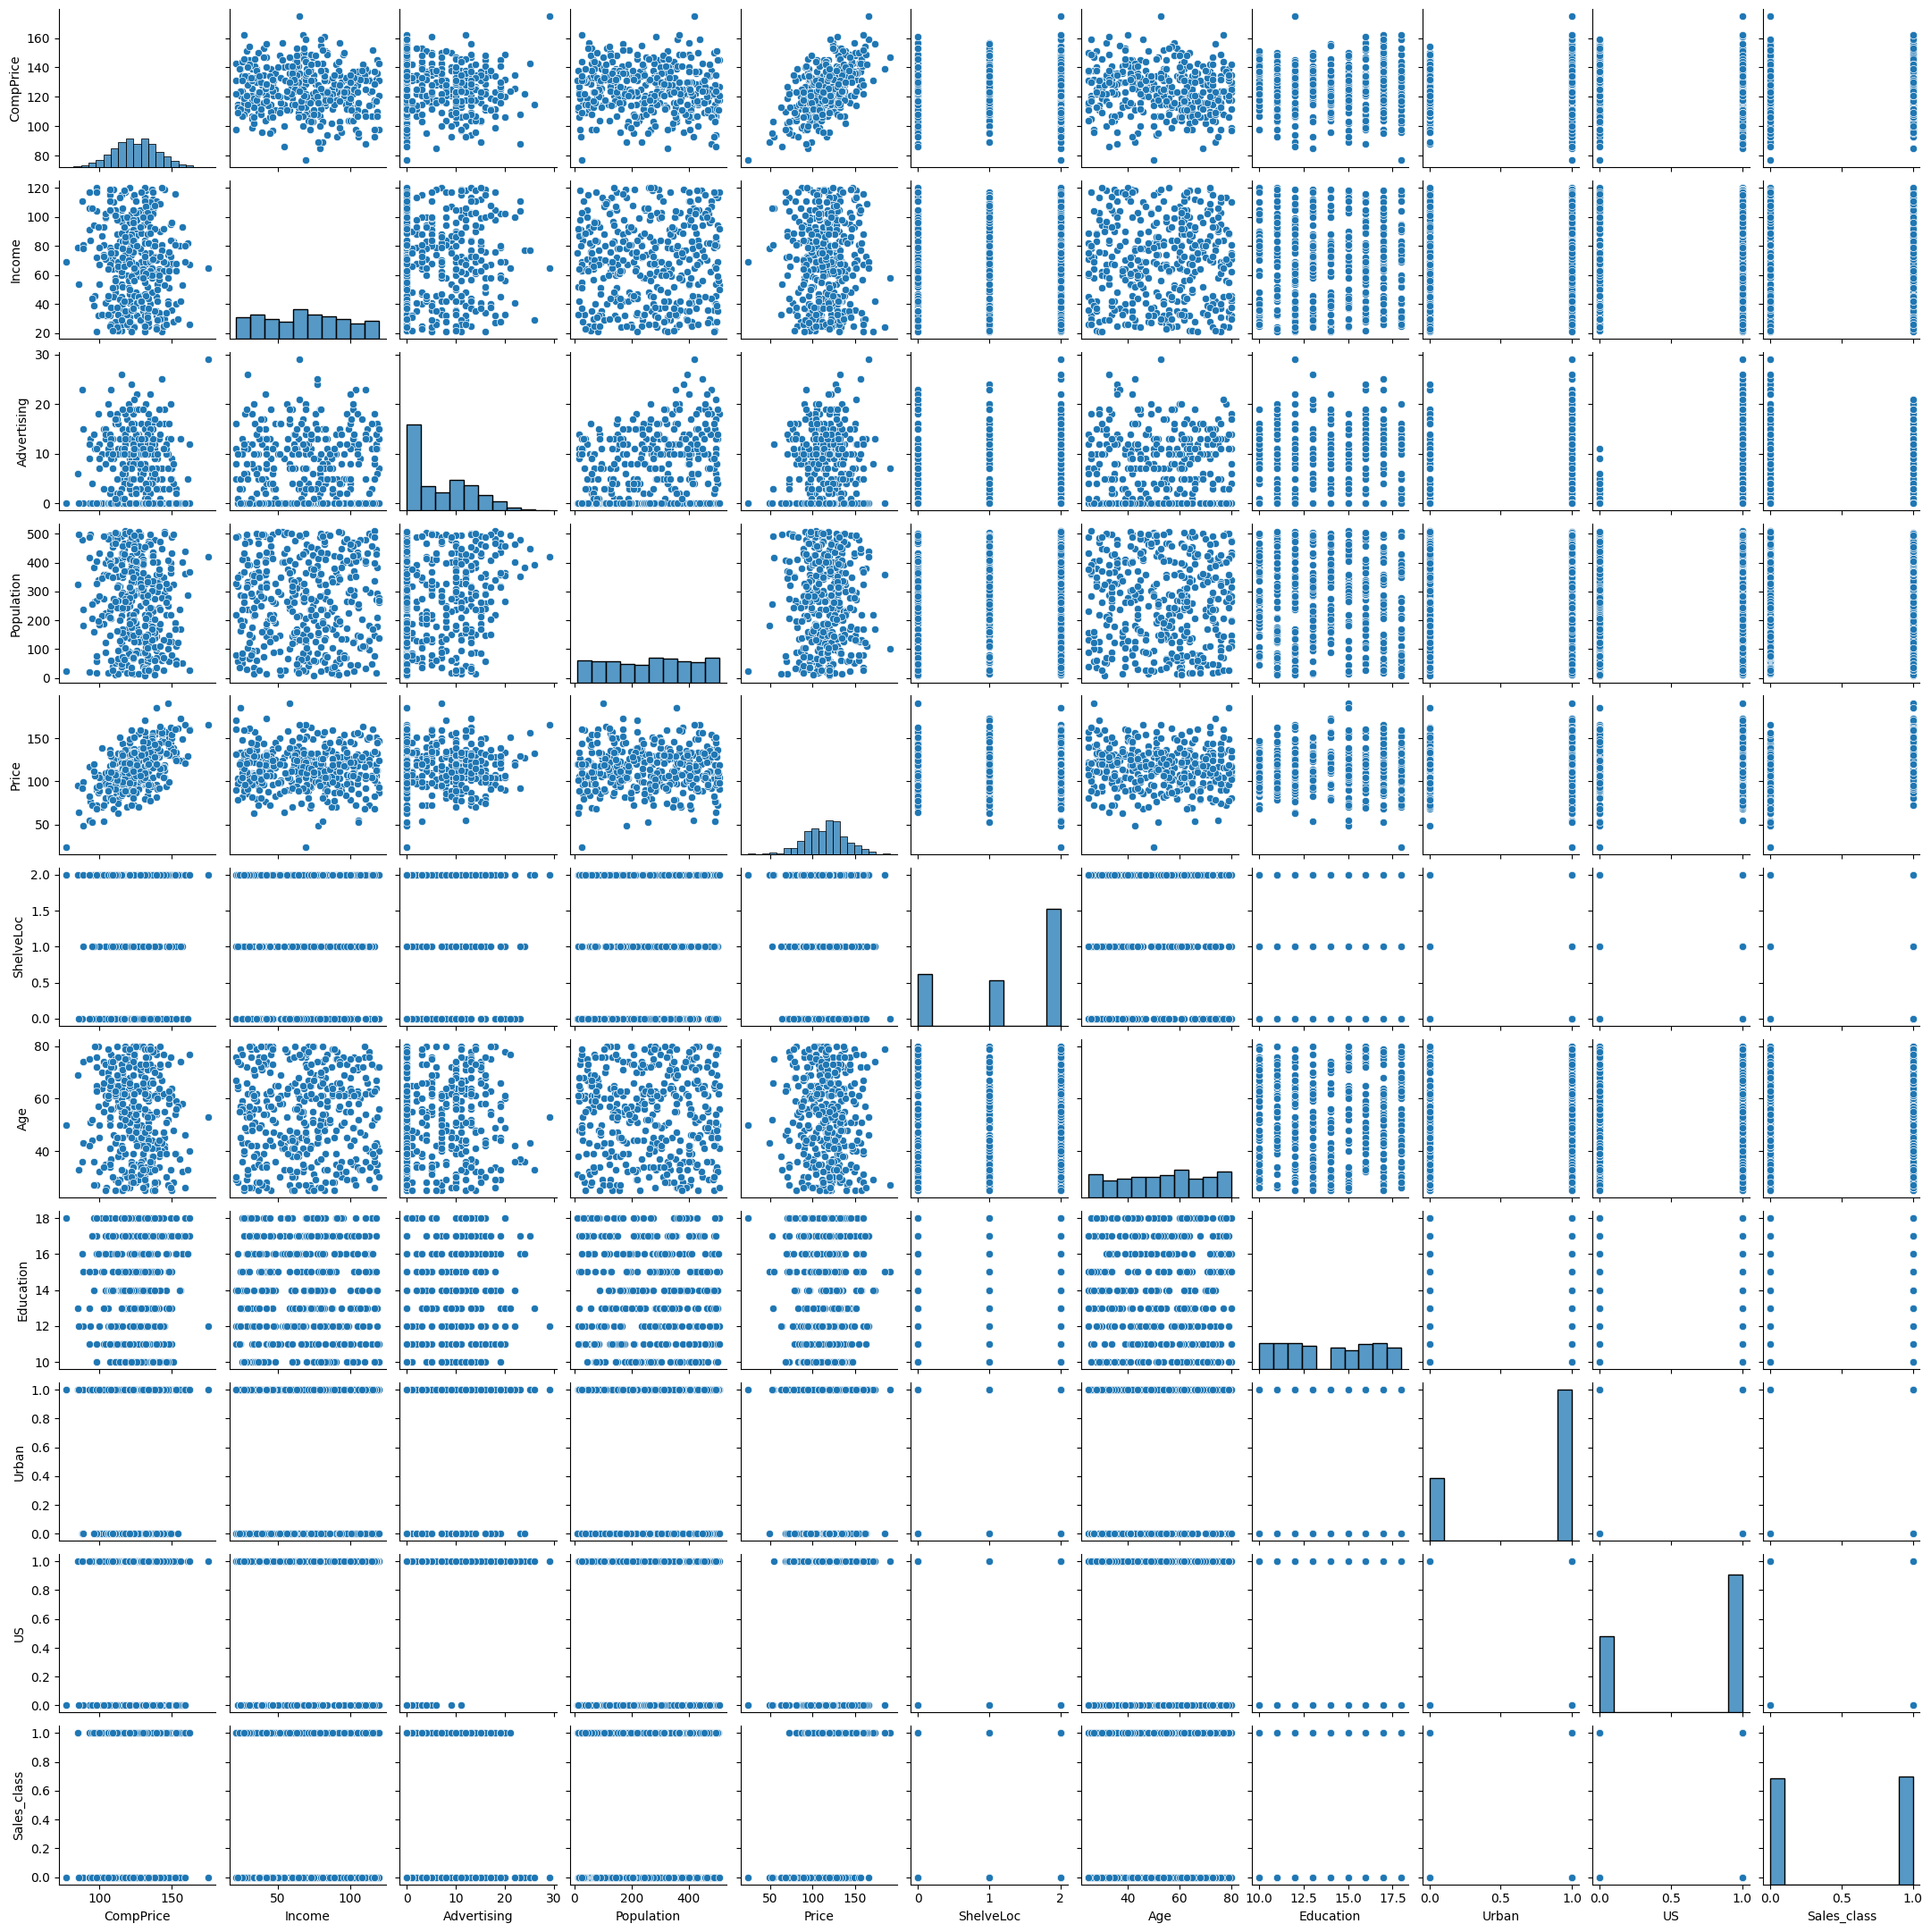

In [21]:

continuous_vars = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 20))
sns.pairplot(continuous_vars, height=2, aspect=1)
plt.show()

<Axes: >

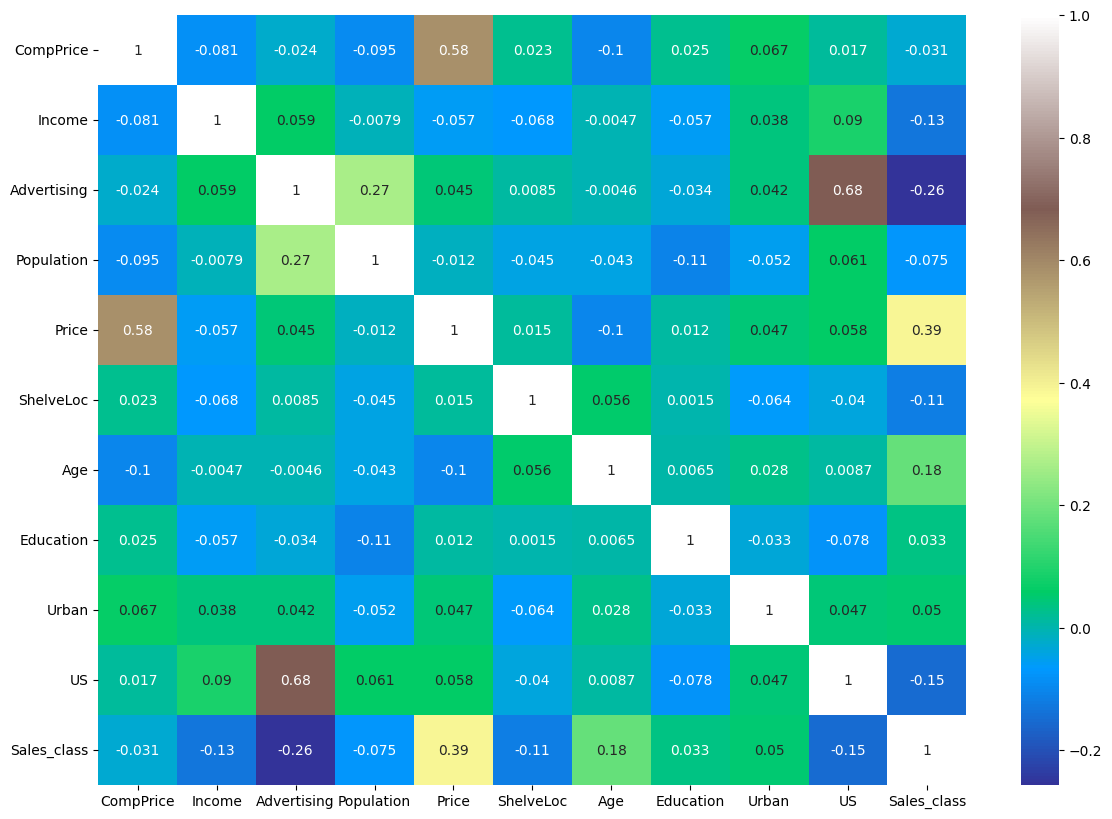

In [22]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [23]:
pdata=df.copy()


In [24]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']
y.value_counts()

1    202
0    198
Name: Sales_class, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [29]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.8


OPTIMIZATION USING GRID SEARCH

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}



grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9)


In [35]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.945


In [36]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.95625


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,random_state=None)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.8150000000000001
